# Importing Dependencies

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('/content/fashion-mnist_train.csv')

In [40]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df.shape

(60000, 785)

In [44]:
test_df = pd.read_csv('/content/fashion-mnist_test.csv')

In [45]:
test_df.shape

(10000, 785)

In [46]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Data Preperation

In [47]:
#shuffling data before splittting into train and dev
df = np.array(df)
m,n = df.shape
np.random.shuffle(df)

In [48]:
#data into proper matrix format required
df_dev = df[0:1000].T
Y_dev = df_dev
X_dev = df_dev[1:n]
X_dev = X_dev/255

In [49]:
train_df = df[1000:m].T
Y_train = train_df[0]
X_train = train_df[1:n]
X_train = X_train/255

In [50]:
X_train[:,0].shape

(784,)

##Model Building

In [51]:
#initializing weights and biases
def init_params():
    
    w1 = np.random.uniform(-0.5,0.5,size = (10,784))
    b1 = np.random.uniform(-0.5,0.5, size = (10,1))
    w2 = np.random.uniform(-0.5,0.5,size = (10,10))
    b2 = np.random.uniform(-0.5,0.5, size = (10,1))
    return w1,b1,w2,b2

In [52]:
#using relu activatiuon function
def ReLU(Z):
    return np.maximum(Z, 0)

In [53]:
#using softmax to categorically sort output values from 0-9 categories
def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis = 0)
    return A

In [54]:
#getting outputs in forward propogation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [55]:
#derivitive of relu function
def ReLU_deriv(Z):
    return Z > 0

In [56]:
#function to convert the output into binary(0,1) 
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [66]:
#introducing L2 regularization parameter and loss functions in this back propogation function
def backprop(Z1,A1,Z2,A2,X,Y,w2,reg_par):
    m = Y.size
    one_hot_Y = one_hot(Y)
    l2_reg_exp = (1/(2*m))*reg_par*(np.sum(np.square(W2)) + np.sum(np.square(W1)))
    dZ2 = (A2 - one_hot_Y) + l2_reg_exp
    loss = np.sum((A2-one_hot_Y)) + l2_reg_exp
    dW2 = 1/m*(dZ2.dot(A1.T)) + 1/m*reg_par*np.sum(W2)
    
    db2 = 1/m*(np.sum(dZ2)) 
    
    dZ1 = W2.T.dot(dZ2)*ReLU_deriv(Z1) 
    
    dW1 = 1/m*(dZ2.dot(X.T))+ 1/m*reg_par*np.sum(W1)
    
    db1 = 1/m*(np.sum(dZ1))
    return dW1,dW2,db1,db2,loss

In [59]:
#dW1,dW2,db1,db2,loss = backward_prop(Z1,A1,Z2,A2,X_train,Y_train,W2,0.01)

In [67]:
#updating parameters after backpropogation
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [68]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [69]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
#using gradient descent method to optimize model and reduce loss
def gradient_descent(X,Y,alpha,iterations):
    W1,b1,W2,b2 = init_params()
    reg_par = 0.01
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,dW2,db1,db2,loss = backprop(Z1,A1,Z2,A2,X,Y,W2,reg_par)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        arg_A2 = get_predictions(A2)
        # printing the accuracy and loss of model after every 100 iterations
        if i%100 == 0 :
            print('Iteration', i)
            print('Accuracy',accuracy_score(arg_A2, Y))
            print('The loss is:',loss)
    return W1,b1,W2,b2

In [81]:
# training model with learning rate 0.1 for 2000 iteration
#any higher learning rate made the predicted minima to overshoot or undershoot
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1 ,2000)

Iteration 0
Accuracy 0.12047457627118643
The loss is: 6.159155012229558e-05
Iteration 100
Accuracy 0.6842881355932203
The loss is: 6.15915516944824e-05
Iteration 200
Accuracy 0.7061525423728814
The loss is: 6.159155243155947e-05
Iteration 300
Accuracy 0.7258983050847457
The loss is: 6.159155329176027e-05
Iteration 400
Accuracy 0.7359830508474576
The loss is: 6.159155116668238e-05
Iteration 500
Accuracy 0.7436101694915255
The loss is: 6.159155146244579e-05
Iteration 600
Accuracy 0.7412881355932204
The loss is: 6.159155104922078e-05
Iteration 700
Accuracy 0.754864406779661
The loss is: 6.159155139405605e-05
Iteration 800
Accuracy 0.7581694915254237
The loss is: 6.15915513992741e-05
Iteration 900
Accuracy 0.758728813559322
The loss is: 6.159155182432299e-05
Iteration 1000
Accuracy 0.7693389830508475
The loss is: 6.159155158423726e-05
Iteration 1100
Accuracy 0.7371186440677966
The loss is: 6.159155326400469e-05
Iteration 1200
Accuracy 0.7490508474576271
The loss is: 6.159155055256251e-05
I

In [ ]:
#We had to use a lot of iterations to get to 76.6% accuracy without minimizing loss. Hence we have to introduce some hyper parameters to ptimize this model and have more variables that we can control.

In [82]:
#fiinal prediction into class of objects
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    #plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


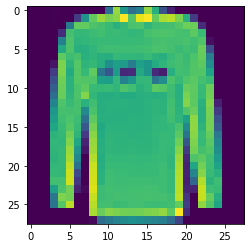

Prediction:  [5]
Label:  5


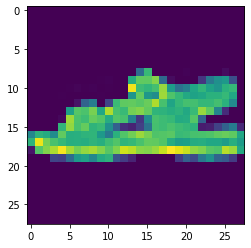

Prediction:  [3]
Label:  3


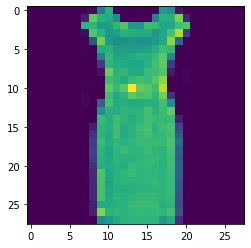

Prediction:  [4]
Label:  4


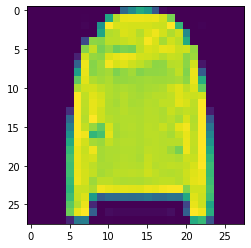

In [83]:
#predictions with differant test examples
test_prediction(120, W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)
test_prediction(28,W1, b1, W2, b2)
test_prediction(87, W1, b1, W2, b2)

In [84]:
#running model to dev dataset. As we can see the model has overfit to the training data as we have a very small accuracy score for dev set.
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 2 7 0 1 0 2 6 9 4 9 4 8 0 5 7 3 4 8 2 0 9 2 0 2 0 2 8 9 9 0 0 7 4 9 4 8
 7 0 7 5 2 8 4 2 2 7 2 5 1 7 3 4 7 8 0 0 3 5 7 0 8 0 3 0 2 8 0 0 0 0 5 2 4
 7 1 5 5 1 5 6 1 4 4 8 3 2 1 5 5 8 4 3 8 8 5 0 4 5 7 1 7 7 5 9 1 2 4 3 5 0
 9 2 9 4 2 4 6 8 8 4 4 8 5 2 5 4 4 6 0 2 0 5 4 4 8 2 3 1 0 7 0 3 3 8 5 9 4
 4 8 0 2 4 1 0 4 0 9 9 6 8 5 8 2 0 4 3 0 0 9 0 0 8 1 5 8 8 2 0 5 7 4 9 5 3
 1 0 4 2 7 4 8 5 4 2 4 5 1 9 2 1 4 1 0 1 3 7 0 9 2 0 4 4 8 0 7 9 4 6 0 4 5
 7 4 2 8 2 9 0 8 9 7 0 4 0 0 0 6 9 5 9 4 4 8 3 7 6 0 3 7 8 3 2 4 4 9 7 2 8
 5 8 7 7 1 4 7 0 8 1 9 8 5 0 0 9 4 5 5 0 1 3 2 5 4 9 7 3 2 4 5 2 0 9 0 9 5
 7 3 4 4 4 9 8 7 4 8 4 2 4 7 8 0 4 3 4 5 5 7 5 1 0 3 7 0 0 2 1 8 7 9 4 4 9
 0 2 3 4 5 3 0 4 4 1 5 3 9 9 1 3 2 8 0 7 3 2 0 3 8 7 9 2 4 9 4 9 5 6 6 0 4
 2 1 7 2 4 1 4 5 1 9 1 6 0 1 5 1 6 4 3 0 0 2 7 4 5 3 9 4 6 4 7 4 0 7 8 6 8
 1 0 0 9 2 8 9 0 5 5 8 7 4 1 4 9 1 8 6 0 7 5 4 3 0 1 1 7 2 8 7 1 4 3 8 9 3
 5 3 1 4 4 5 2 8 8 6 2 4 0 3 8 2 0 2 9 5 9 8 3 7 6 1 0 2 9 3 7 3 4 0 4 5 8
 9 0 0 9 8 8 0 6 5 7 9 4 

0.06347643312101911